# Week 2: Day 3 AM // K - Nearest Neighbor Classifier

# A. KNN Introduction

## Import Libraries

First, let's import some libraries that we will use to demonstrate K - Nearest Neighbor.

In [ ]:
# Import Libraris

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc,roc_auc_score

%matplotlib inline

## Generate sample data

In [ ]:
# Function for Generate Data that Will Be Used by KNN

def generate_sample(x1_center, x2_center, max_radius, num_samples, ymax=999, ymin=-999):
    i = 0
    x1_list = []
    x2_list = []
    x1_min = x1_center - max_radius
    x1_max = x1_center + max_radius
    x2_min = x2_center - max_radius
    x2_max = x2_center + max_radius
    while i < num_samples:
        x1 = np.random.uniform(x1_min, x1_max)
        x2 = np.random.uniform(x2_min, x2_max)
        mag_data = np.power(x1 - x1_center, 2) + np.power(x2 - x2_center, 2)
        if (
            (mag_data <= np.power(max_radius, 2))
            & (x2 > ymin)
            & (x2 < ymax)
        ):
            x1_list.append(x1)
            x2_list.append(x2)
            i = i + 1
        else:
            continue

    return np.vstack((x1_list, x2_list)).T

In [ ]:
# Generate Dataset

x1_centers = [0, 0, 2]
x2_centers = [0, 2, 0]
num_data = 50

datas = []
for i in range(0,len(x1_centers)):
    datas.append(generate_sample(x1_centers[i], x2_centers[i], 1.5, num_data))
    
X = np.vstack(datas)
y = list(np.hstack([[1] * num_data,[2] * num_data,[3] * num_data]))

In [ ]:
# Display Data

## Display First 10 Data from X and y
print('First 10 Data')
print('X : ', X[:10])
print('y : ', y[:10])
print('')

## Display Number of Total Data per Class
print('Number of Total Data per Class')
for cls in list(set(y)):
  print('Class : ', cls, ' - Count : ', y.count(cls))

First 10 Data
X :  [[-0.46199119  0.6021182 ]
 [-0.68976989  0.08102106]
 [ 0.63968558 -0.80566849]
 [ 0.08701584 -0.6702338 ]
 [-0.97613026  0.23479844]
 [ 1.44070507  0.10056366]
 [ 0.19330328  0.93642036]
 [-1.24209818 -0.65445522]
 [ 1.02518815  0.69941317]
 [-0.52942878 -0.32385934]]
y :  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Number of Total Data per Class
Class :  1  - Count :  50
Class :  2  - Count :  50
Class :  3  - Count :  50


(-2.0, 4.0)

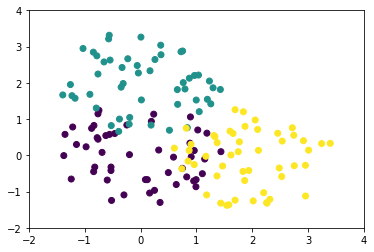

In [ ]:
# Visualization of Dataset

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-2,4)
plt.ylim(-2,4)

Color description from above graph :
* Class `1` : Purple
* Class `2` : Green
* Class `3` : Yellow

In [ ]:
# Save the Colors into a Dictionary

class_colors = {
    '1': 'purple',
    '2': 'green',
    '3': 'yellow'
}

## Nearest Neighbors

Let's find the neighbors of two test data on the previously created dataset. To do that, we are going to implement module `NearestNeighbors` from Scikit-learn.

In [ ]:
# Define Two Test Data

X_sample = np.array(([0,1],[1,0]))

In [ ]:
# Create Object of NearestNeighbors and Enter Dataset into this Object

neigh = NearestNeighbors(n_neighbors=15)
neigh.fit(X,y)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                 radius=1.0)

In [ ]:
# Get the Neighbors for Test Data

neighbors_distances, neighbors_indices = neigh.kneighbors(X_sample)
y = np.array(y)

print('X_sample[0]               : ', X_sample[0])
print('Neighbors Distance        : ', neighbors_distances[0].tolist())
print('Neighbors Index           : ', neighbors_indices[0])
print('Neighbors Class           : ', y[neighbors_indices[0]])
print('Neighbors Class (Counter) : ', [(cls, list(y[neighbors_indices[0]]).count(cls)) for cls in list(set(y))])
print('Max Class                 : ', max(list(y[neighbors_indices[0]]), key=list(y[neighbors_indices[0]]).count))
print('Class Color               : ', class_colors[str(max(list(y[neighbors_indices[0]]), key=list(y[neighbors_indices[0]]).count))])
print('')

print('X_sample[1]               : ', X_sample[1])
print('Neighbors Distance        : ', neighbors_distances[1].tolist())
print('Neighbors Index           : ', neighbors_indices[1])
print('Neighbors Class           : ', y[neighbors_indices[1]])
print('Neighbors Class (Counter) : ', [(cls, list(y[neighbors_indices[1]]).count(cls)) for cls in list(set(y))])
print('Max Class                 : ', max(list(y[neighbors_indices[1]]), key=list(y[neighbors_indices[1]]).count))
print('Class Color               : ', class_colors[str(max(list(y[neighbors_indices[1]]), key=list(y[neighbors_indices[1]]).count))])
print('')

X_sample[0]               :  [0 1]
Neighbors Distance        :  [0.19923163020956752, 0.20349086000025074, 0.24777520174263878, 0.2516933327923715, 0.2720385274220538, 0.29529750359988116, 0.37837500914987404, 0.5182757232256111, 0.5287953923492184, 0.5551177737907809, 0.6019518476538415, 0.6097095948070724, 0.6972813315621165, 0.7711391280989437, 0.7769317893845584]
Neighbors Index           :  [71  6 72 53 43 16 61 92 86 94 77  0 13 11 37]
Neighbors Class           :  [2 1 2 2 1 1 2 2 2 2 2 1 1 1 1]
Neighbors Class (Counter) :  [(1, 7), (2, 8), (3, 0)]
Max Class                 :  2
Class Color               :  green

X_sample[1]               :  [1 0]
Neighbors Distance        :  [0.10053281044839103, 0.1373605133427522, 0.17200975245798217, 0.1813558915462149, 0.18782524965069228, 0.21796873029137603, 0.25813847549349994, 0.3179051262328382, 0.35493436247879573, 0.41247026929949937, 0.4378304459131553, 0.4415637771774027, 0.4520331889000703, 0.452942369873705, 0.5108294446765632]
N

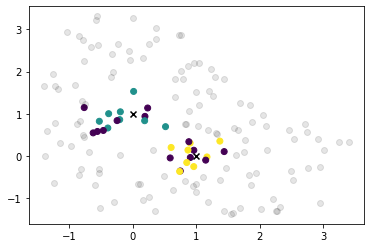

In [ ]:
# Visualization of the Neighbors of Test Data

neighbors_indices = neighbors_indices.flatten().tolist()

X_neighbors =  X[neighbors_indices]
y_neighbors = y[neighbors_indices]
X_not_neighbors = np.array([element for i, element in enumerate(X) if i not in neighbors_indices])


plt.scatter(X_neighbors[:,0], X_neighbors[:,1], c=y_neighbors)
plt.scatter(X_sample[:,0], X_sample[:,1], marker='x', c='k')
plt.scatter(X_not_neighbors[:,0], X_not_neighbors[:,1], c='k', alpha=0.1)

As we see, there are data points that are closer to our sample points compared to other neighbors. Currently, those close data points will have the same vote weight as the one that is farther. We can modify this charactheristic by using euclidean distance as weight factor on majority vote to reflect that closer data points have closer resemblance.

## Using K-Nearest Neighbor Classifier

In the code above, we see the neighbors for test data. But we must compute manually the maximum class to get the prediction class. Let's use module `KNeighborsClassifier` from Scikit Learn to get automatically our class prediction.

In [ ]:
# Create Object of KNeighborsClassifier and Enter Dataset into this Object

neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
# Predict Test Data

y_predictions = neigh.predict(X_sample)

print('Predictions - X_sample[0] : ', y_predictions[0])
print('Predictions - X_sample[1] : ', y_predictions[1])

Predictions - X_sample[0] :  2
Predictions - X_sample[1] :  3


### Effect of distance functions

We can use different type of distances function, which may results to different nearest neighbors. For example, let's try using 4 different distances type:  
- Euclidean 
- Minkowski
- Manhattan
- Mahalanobis

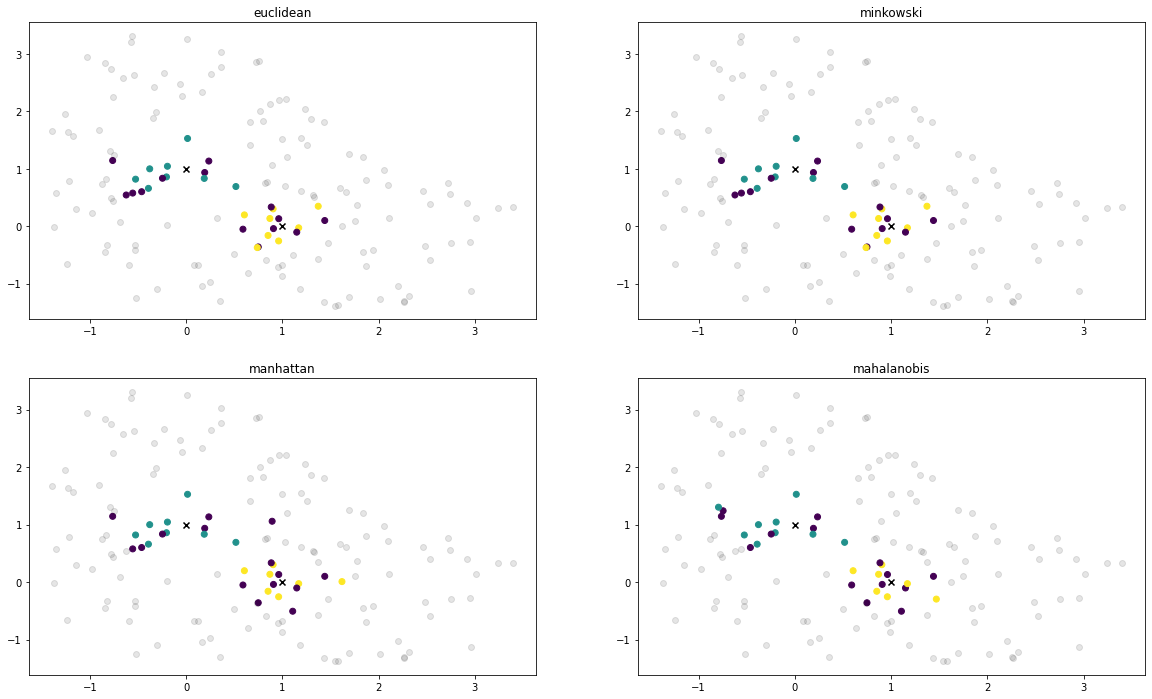

In [ ]:
metrictypes=['euclidean','minkowski','manhattan','mahalanobis']
fig, axs = plt.subplots(int(len(metrictypes)/2), 2, figsize=(20, 12))
for i,metrictype in enumerate(metrictypes):
    if(metrictype=='mahalanobis'):
        neigh = NearestNeighbors(n_neighbors=15,algorithm='brute', metric=metrictype,metric_params={'V': np.cov(X)})
    else:
        neigh = NearestNeighbors(n_neighbors=15,metric=metrictype)
    neigh.fit(X,y)
    neighbors=neigh.kneighbors(X_sample)
    id_arr = neighbors[1]
    id_arr = id_arr.flatten().tolist()

    arr =  X[id_arr]
    y = np.array(y)
    arr_y = y[id_arr]
    arr_ex = np.array([element for i, element in enumerate(X) if i not in id_arr])

    axs[int(i/2),i%2].scatter(arr[:,0],arr[:,1],c=arr_y)
    axs[int(i/2),i%2].scatter(X_sample[:,0],X_sample[:,1],marker='x',c='k')
    axs[int(i/2),i%2].scatter(arr_ex[:,0],arr_ex[:,1],c='k',alpha=0.1)
    axs[int(i/2),i%2].set_title(metrictype)

We can see there are changes at the edges point due to how the distance calculated differently

# B. KNN on Real Dataset

Let's try to use KNN Classifier on real world data. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


URL = [Prima Indians Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [ ]:
# Load Dataset

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Check Features of Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that the dataset has no missing values.

In [ ]:
# Create Final Dataset

X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [ ]:
# Split Dataset into Train Data and Test Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

print('Total Data Train : ', X_train.shape[0])
print('Total Data Test  : ', X_test.shape[0])

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Total Data Train :  537
Total Data Test  :  231


In [ ]:
# Train

%%time
cls_knn_euclidean = KNeighborsClassifier(n_neighbors=5)
cls_knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

cls_knn_euclidean.fit(X_train, y_train)
cls_knn_manhattan.fit(X_train, y_train)

CPU times: user 4 ms, sys: 29 µs, total: 4.03 ms
Wall time: 4.06 ms


In [ ]:
# Check Accuracy of Test Data

acc_knn_euclidean = cls_knn_euclidean.score(X_test, y_test)
acc_knn_manhattan = cls_knn_manhattan.score(X_test, y_test)

print('Accuracy - KNN - Euclidean : ', acc_knn_euclidean)
print('Accuracy - KNN - Manhattan : ', acc_knn_manhattan)

Accuracy - KNN - Euclidean :  0.7229437229437229
Accuracy - KNN - Manhattan :  0.6796536796536796


---

Let's check the effect of `k` on the accuracy of Train Data and Test Data.

In [ ]:
# Get Accuracy from k = 1 to k = 15
%%time

max_k = 15

train_acc_euclidean = []
test_acc_euclidean = []

train_acc_manhattan = []
test_acc_manhattan = []

for ii in range (1, max_k+1):
  # With Euclidean Distance
  cls_knn_euclidean = KNeighborsClassifier(n_neighbors = ii)
  cls_knn_euclidean.fit(X_train, y_train)

  train_acc_euclidean.append(cls_knn_euclidean.score(X_train, y_train))
  test_acc_euclidean.append(cls_knn_euclidean.score(X_test, y_test))

  # With Manhattan Distance
  cls_knn_manhattan = KNeighborsClassifier(n_neighbors = ii, metric='manhattan')
  cls_knn_manhattan.fit(X_train, y_train)

  train_acc_manhattan.append(cls_knn_manhattan.score(X_train, y_train))
  test_acc_manhattan.append(cls_knn_manhattan.score(X_test, y_test))

print('Train Accuracy - Euclidean : ', train_acc_euclidean)
print('Test Accuracy - Euclidean  : ', test_acc_euclidean, '\n')

print('Train Accuracy - Manhattan : ', train_acc_manhattan)
print('Test Accuracy - Manhattan  : ', test_acc_manhattan, '\n')


Train Accuracy - Euclidean :  [1.0, 0.8286778398510242, 0.8230912476722533, 0.7914338919925512, 0.8044692737430168, 0.7746741154562383, 0.7877094972067039, 0.7783985102420856, 0.7914338919925512, 0.7635009310986964, 0.7728119180633147, 0.7653631284916201, 0.7746741154562383, 0.7728119180633147, 0.7690875232774674]
Test Accuracy - Euclidean  :  [0.7056277056277056, 0.70995670995671, 0.7229437229437229, 0.7402597402597403, 0.7229437229437229, 0.7186147186147186, 0.7056277056277056, 0.6926406926406926, 0.7186147186147186, 0.7142857142857143, 0.7359307359307359, 0.7489177489177489, 0.7619047619047619, 0.7575757575757576, 0.7662337662337663] 

Train Accuracy - Manhattan :  [1.0, 0.8119180633147114, 0.8175046554934823, 0.8044692737430168, 0.8026070763500931, 0.7932960893854749, 0.7932960893854749, 0.7728119180633147, 0.7877094972067039, 0.7746741154562383, 0.7746741154562383, 0.7467411545623837, 0.7653631284916201, 0.7616387337057728, 0.7821229050279329]
Test Accuracy - Manhattan  :  [0.7012

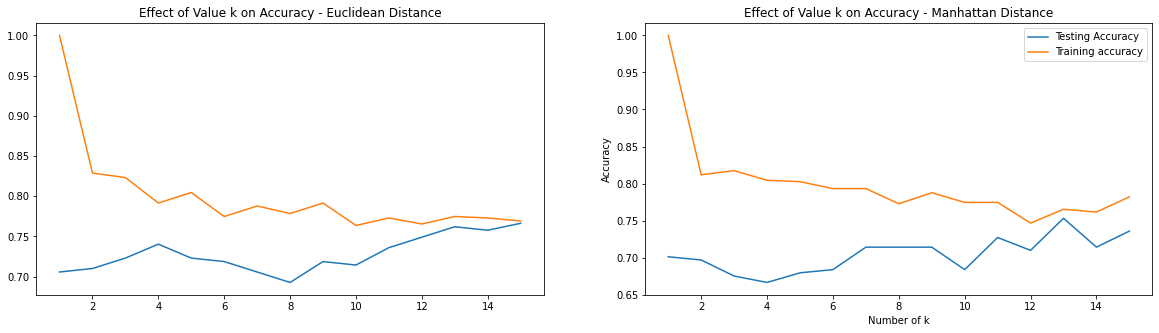

In [ ]:
# Visualization of Accuracy


plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('Effect of Value k on Accuracy - Euclidean Distance')
plt.plot(range(1, max_k+1), test_acc_euclidean, label='Testing Accuracy')
plt.plot(range(1, max_k+1), train_acc_euclidean, label='Training accuracy')

plt.subplot(1, 2, 2)
plt.title('Effect of Value k on Accuracy - Manhattan Distance')
plt.plot(range(1, max_k+1), test_acc_manhattan, label='Testing Accuracy')
plt.plot(range(1, max_k+1), train_acc_manhattan, label='Training accuracy')

plt.legend()
plt.xlabel('Number of k')
plt.ylabel('Accuracy')
plt.show()

`kNN Classifier` is a lazy learning method, thus **time to predict is relatively slower compared to time to fit/train**. This is contrast to model like `Logistic Regression`, `Decision Tree`, or `Artifical Neural Network`.

---

Let's compare its performance with logistic regression that we have previously learned

In [ ]:
# Train with Logistic Regression
%%time

logreg = LogisticRegression(random_state=10)
logreg.fit(X_train, y_train)

CPU times: user 7.53 ms, sys: 0 ns, total: 7.53 ms
Wall time: 8.55 ms


In [ ]:
# Check Accuracy of Test Data

acc_logreg = logreg.score(X_test, y_test)

print('Accuracy - KNN - Euclidean     : ', acc_knn_euclidean)
print('Accuracy - KNN - Manhattan     : ', acc_knn_manhattan)
print('Accuracy - Logistic Regression : ', acc_logreg)

Accuracy - KNN - Euclidean     :  0.7229437229437229
Accuracy - KNN - Manhattan     :  0.6796536796536796
Accuracy - Logistic Regression :  0.8095238095238095
